## Queremos gerar e medir o seguinte estado:

$$\vert \psi \rangle =  \frac{\vert 00 \rangle + \vert 11 \rangle}{\sqrt{2}}$$

Começamos importando o qiskit e em seguida criamos o circuito.

In [1]:
from qiskit import*

In [2]:
nQ = 2 # <−− número de qubits
nC = 2 # <−− número de bits clássicos
Qr = QuantumRegister(nQ)
Cr = ClassicalRegister(nC)

In [3]:
circuit = QuantumCircuit(Qr , Cr )

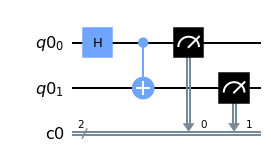

In [4]:
# Porta Hadamard aplicada ao 1º qubit:
circuit.h(0) 

# Porta CNOT: a ordem é controle, alvo:
circuit.cx(0 , 1) 

# Medindo os dois qubits [0, 1], 
# os resultados são armazenados
# em bits clássicos [0, 1] nesta ordem:
circuit.measure([ 0 , 1 ] , [ 0 , 1 ]) 

# Desenha o circuito:
circuit.draw(output='mpl')

## Simulação na máquina local 

In [5]:
simulator = Aer.get_backend('qasm_simulator')

In [6]:
result = execute( circuit , backend = simulator).result( )

In [7]:
from qiskit.visualization import plot_histogram

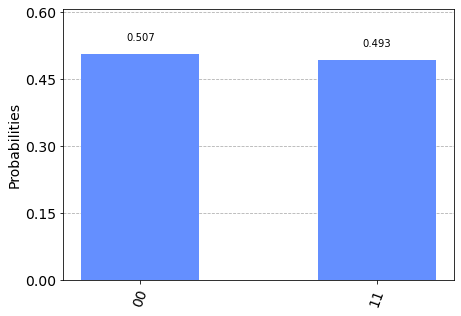

In [8]:
plot_histogram( result.get_counts(circuit) )

## Registrando-se na IBM Quantum Computing

In [9]:
# Registrando-se na IBM Quantum Computing
from qiskit import IBMQ
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
# Você pode obter o seu token em:
# https://quantum-computing.ibm.com/
QX_TOKEN = "Cole seu token aqui"
QX_URL = "https://quantumexperience.ng.bluemix.net/api"
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
try :
    IBMQ.save_account(QX_TOKEN);
    print('Registado com sucesso!')
except :
    print('Algo deu errado.\nVocê inseriu o token correto?')

configrc.store_credentials:WARNING:2021-09-01 13:00:30,253: Credentials already present. Set overwrite=True to overwrite.


Registado com sucesso!


## Agora vem a parte divertida, que é executar o circuito que construímos em um computador quântico. Existem varios dispositivos quânticos que a IBM disponibiliza o acesso via nuvem. Para usar esses dispositivos, primeiro teremos que carregar uma conta IBMQ.

In [10]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Verificando as máquinas disponíveis: 

In [11]:
from qiskit.tools.monitor import  backend_overview

backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 6              Pending Jobs: 6
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      129.9          Avg. T1:      88.8           Avg. T1:      94.2
Avg. T2:      62.7           Avg. T2:      104.0          Avg. T2:      122.4



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 58             Pending Jobs: 1402           Pending Jobs: 20
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           O

A seguir, teremos que fornecer detalhes do provedor IBMQ e do computador quântico que escolhemos para executar nosso circuito.

In [12]:
provider=IBMQ.get_provider('ibm-q')
quantum_computer=provider.get_backend('ibmqx2')

Usamos a função execute() para executar nosso circuito quântico usando ibmq_belem como nosso back-end:

In [13]:
execute_circuit=execute(circuit,backend=quantum_computer)

Para ver os resultados, basta executar o seguinte comando:

In [14]:
result=execute_circuit.result()

Para visualizar os resultados, execute o seguinte comando:

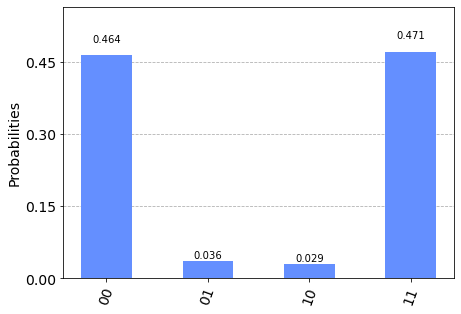

In [15]:
plot_histogram(result.get_counts(circuit))

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\warle\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
